In [43]:
import numpy as np
from PIL import Image, ImageDraw
import json
import matplotlib.pyplot as plt 
import cv2
from jsonmerge import merge
import io

In [80]:
#dir_ = '0-531/' #до 348 размечено 
#dir_ = '1064-1595/' #до 01324 размечено
# dir_ = '1596-2127(возможно кривойjson)/' #да кривой, оба джейсона дают все пустые маски

# dir_ = '2128-2659/' #до 2427 размечено
#dir_ = '2660-3191/' # до 2965

# dir_ = '3192-3723/' # 3292

dir_ = '532-1063/' #как-то неравномерно

In [16]:
folder_lst = ['Fifth_3',
              'First_10',
              'Forth_6',
              'Second_0',
              'Second_2',
              'Second_4',
              'Sixth_2',
              'Sixth_3']

for folder_name in folder_lst:
    dir_ = '/home/natasha/unet4/axial_data/train/' + folder_name + '/'
    json1 = 'T2Tra_' + folder_name + '_s.json'
    json2 = 'T2Tra_' + folder_name + '_h.json'
    

    with open(dir_ + json1) as file:
        j1 = json.load(file)
        
    with open(dir_ + json2) as file:
        j2 = json.load(file)
    
    raw_data = merge(j1, j2)
    all_keys = []
    
    for key in raw_data['_via_img_metadata'].keys():
        all_keys.append(key)

    print(len(all_keys))

    pics_path = dir_ + 'pictures/'
    masks_path = dir_ + 'masks/'
    
    fucked_imgs = []

    for k in range(0, len(all_keys)):
        filename = raw_data['_via_img_metadata'][all_keys[k]]['filename']

        image = Image.open(pics_path + filename)
        width = image.size[0] 
        height = image.size[1]

        img = Image.new('LA', (width, height), 0)
        for i in range(len(raw_data['_via_img_metadata'][all_keys[k]]['regions'])):
            try:
                xs = raw_data['_via_img_metadata'][all_keys[k]]['regions'][i]['shape_attributes']['all_points_x']
                ys = raw_data['_via_img_metadata'][all_keys[k]]['regions'][i]['shape_attributes']['all_points_y']
                all_pairs = []
                for j in range(len(ys)):
                    all_pairs.append((xs[j], ys[j]))

                if raw_data['_via_img_metadata'][all_keys[k]]['regions'][i]['region_attributes']['А3'] == 'disc':
                    ImageDraw.Draw(img).polygon(all_pairs, outline=1, fill=1)
                    print('f1')
                elif raw_data['_via_img_metadata'][all_keys[k]]['regions'][i]['region_attributes']['А3'] == 'spinal canal':
                    ImageDraw.Draw(img).polygon(all_pairs, outline=2, fill=2)
                    print('f2')
                elif raw_data['_via_img_metadata'][all_keys[k]]['regions'][i]['region_attributes']['А3'] == 'nerv':
                    ImageDraw.Draw(img).polygon(all_pairs, outline=3, fill=3)
                    print('f3')
                elif raw_data['_via_img_metadata'][all_keys[k]]['regions'][i]['region_attributes']['А3'] == 'neural foramen':
                    ImageDraw.Draw(img).polygon(all_pairs, outline=4, fill=4)
                    print('f4')
                elif raw_data['_via_img_metadata'][all_keys[k]]['regions'][i]['region_attributes']['А3'] == 'size of spinal canal':
                    ImageDraw.Draw(img).polygon(all_pairs, outline=5, fill=5)
                    print('f5')
                elif raw_data['_via_img_metadata'][all_keys[k]]['regions'][i]['region_attributes']['А3'] == 'size of herniation':
                    ImageDraw.Draw(img).polygon(all_pairs, outline=6, fill=6)
                    print('f6')
            except:
#                 print('fucked image - not labeled at all or прямоугольник')
                fucked_imgs.append(pics_path + filename)


        mask = np.array(img)

#         plt.imsave(masks_path +filename, mask)



100
390
224
50
312


FileNotFoundError: [Errno 2] No such file or directory: '/home/natasha/unet4/axial_data/train/Second_2/pictures/00268.PNG'

In [62]:
np.unique(mask)

array([0], dtype=uint8)

In [85]:
raw_data = []
with open('/home/natasha/unet4/axial_data/train/Fifth_3/T2Tra_Fifth_3_s.json', "r") as file: 
#with open(dir_+"MRI_3723.json", "r") as file: #беру всегда part2, когда он есть, потому что они выглядят the same
    raw_data = json.load(file)

In [86]:
all_keys = []
for key in raw_data['_via_img_metadata'].keys():
    all_keys.append(key)
len(all_keys)

100

In [87]:
folder_name = 'Fifth_3'
dir_ = '/home/natasha/unet4/axial_data/train/' + folder_name + '/'

In [88]:
pics_path = dir_ + 'pictures/'
masks_path = dir_ + 'masks/'

In [89]:
import os
if not os.path.exists(masks_path):
    os.makedirs(masks_path)

In [96]:
fucked_imgs = []
for k in range(0, len(all_keys)):
    filename = raw_data['_via_img_metadata'][all_keys[k]]['filename']

    image = Image.open(pics_path + filename)
    width = image.size[0] 
    height = image.size[1]
    
    img = Image.new('LA', (width, height), 0)
    for i in range(len(raw_data['_via_img_metadata'][all_keys[k]]['regions'])):
        try:
            xs = raw_data['_via_img_metadata'][all_keys[k]]['regions'][i]['shape_attributes']['all_points_x']
            ys = raw_data['_via_img_metadata'][all_keys[k]]['regions'][i]['shape_attributes']['all_points_y']
            all_pairs = []
            for j in range(len(ys)):
                all_pairs.append((xs[j], ys[j]))

            if raw_data['_via_img_metadata'][all_keys[k]]['regions'][i]['region_attributes']['A3'] == 'disc':
                ImageDraw.Draw(img).polygon(all_pairs, outline=1, fill=1)

            elif raw_data['_via_img_metadata'][all_keys[k]]['regions'][i]['region_attributes']['A3'] == 'spinal canal':
                ImageDraw.Draw(img).polygon(all_pairs, outline=2, fill=2)

        except:
#             print('fucked image - not labeled at all or прямоугольник')
            fucked_imgs.append(pics_path + filename)
            
        
    mask = numpy.array(img)

#     plt.imsave(masks_path +filename, mask)


g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f
g
f


In [95]:
raw_data['_via_img_metadata'][all_keys[k]]['regions'][0]['region_attributes']['A3']

'disc'

In [84]:
width = 10
height = 10
img = Image.new('LA', (width, height), 0)

In [56]:
ImageDraw.Draw(img).polygon([1, 2, 1, 2], outline=2, fill=2)

In [57]:
img = np.array(img)

In [58]:
if img.max() > 1:
    img = img / 255

TypeError: Invalid shape (10, 10, 2) for image data

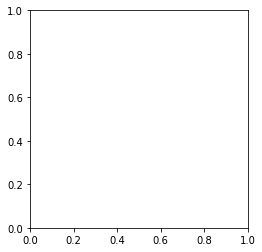

In [60]:
plt.imshow(img, cmap='gray')

TypeError: Image data of dtype object cannot be converted to float

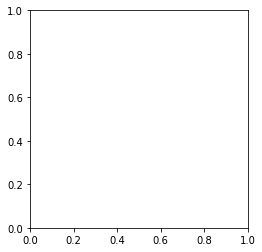

In [50]:
import math 
from PIL import Image, ImageDraw 
from PIL import ImagePath  
  
side = 8
xy = [ 
    ((math.cos(th) + 1) * 90, 
     (math.sin(th) + 1) * 60) 
    for th in [i * (2 * math.pi) / side for i in range(side)] 
    ]   
  
image = ImagePath.Path(xy).getbbox()   
size = list(map(int, map(math.ceil, image[2:]))) 
  
img = Image.new("RGB", size, "#f9f9f9")  
img1 = ImageDraw.Draw(img)   
img1.polygon(xy, fill ="#eeeeff", outline ="blue")  
  
plt.imshow(img1)
